# Case Study: Breast cancer  
- Step #1 : Problem Statement
- Step #2 : Importing data
- Step #3 : Data Visualisations
- Step #4 : Model Training
- Step #5 : Model Evaluations
- Step #6 : Improving the model
- Step #7 : Conclustions 

### Step#1: Problem statement
- predicting if the cancer diagnosis is benign or malignant based on several observations/features
- 30 features are used example:
        - redius (mean of distance from the center point on the perimeter)
        - texture ( Standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variations in radius length)
        - compactness ( perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave point ( number of concave portions of the contour)
        - symmetry
        - fractal dimension ( "coastline approximations?" - 1)
- Datasets are linearly seperable using all the 30 input features
- Number of instances: 569
- Class Distributions: 212 Malignant, 357 Benign
- Targer class:
        - Malignant
        - Benign

(Data Set) [https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29]


### Step #2: Importing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [8]:
print(cancer.get('DESCR'))

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [9]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
cancer.get("feature_names")

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
cancer['data'].shape

(569, 30)

In [12]:
print(cancer.get("data"))

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [14]:
df_cancer= pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [15]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### STEP 3#: Visulaizing the data

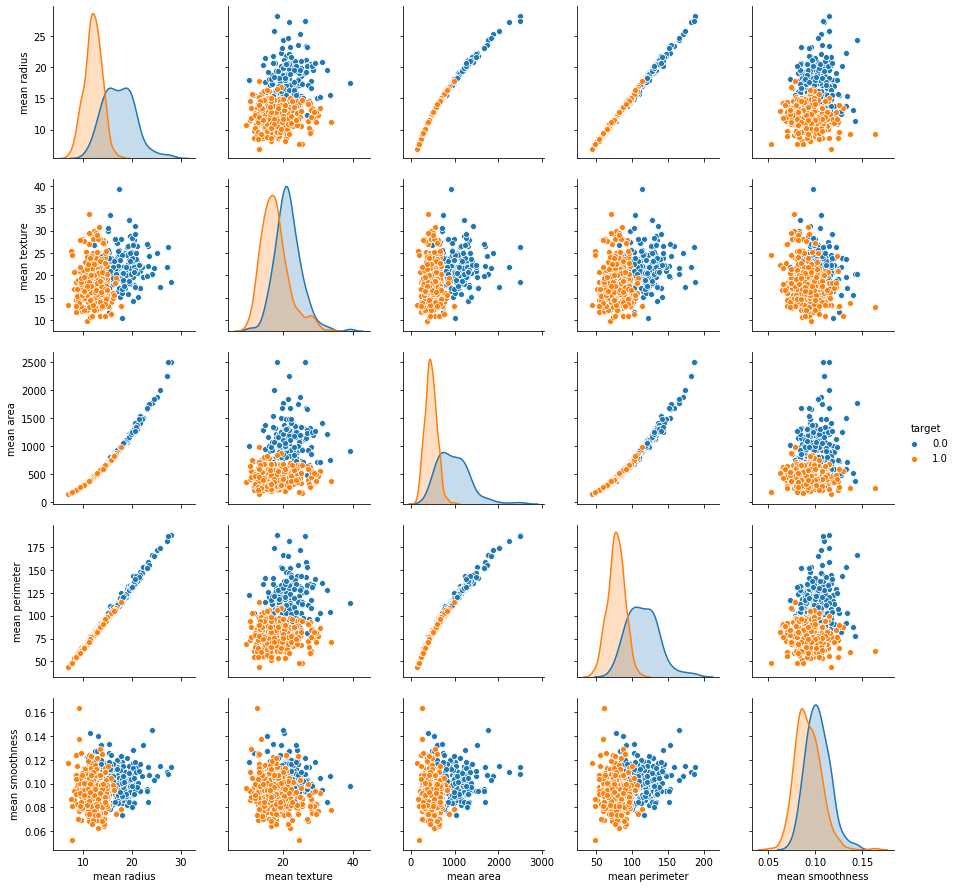

In [21]:
#Pair plot, Count plot and scatter plot ( Finding the corrlations with data using heat map)
sns.pairplot(df_cancer, 
             vars = ['mean radius', 'mean texture','mean area', 'mean perimeter', 'mean smoothness' ],
             hue = 'target' # helps differenciate in different color
            )

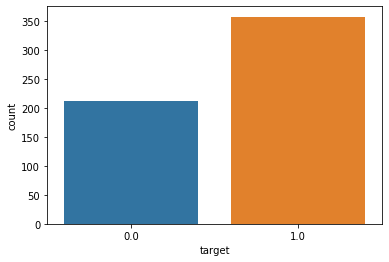

In [22]:
sns.countplot(df_cancer['target'])

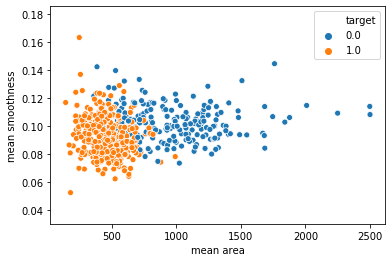

In [24]:
sns.scatterplot(x='mean area',
                y= 'mean smoothness',
                hue = 'target',
                data = df_cancer)

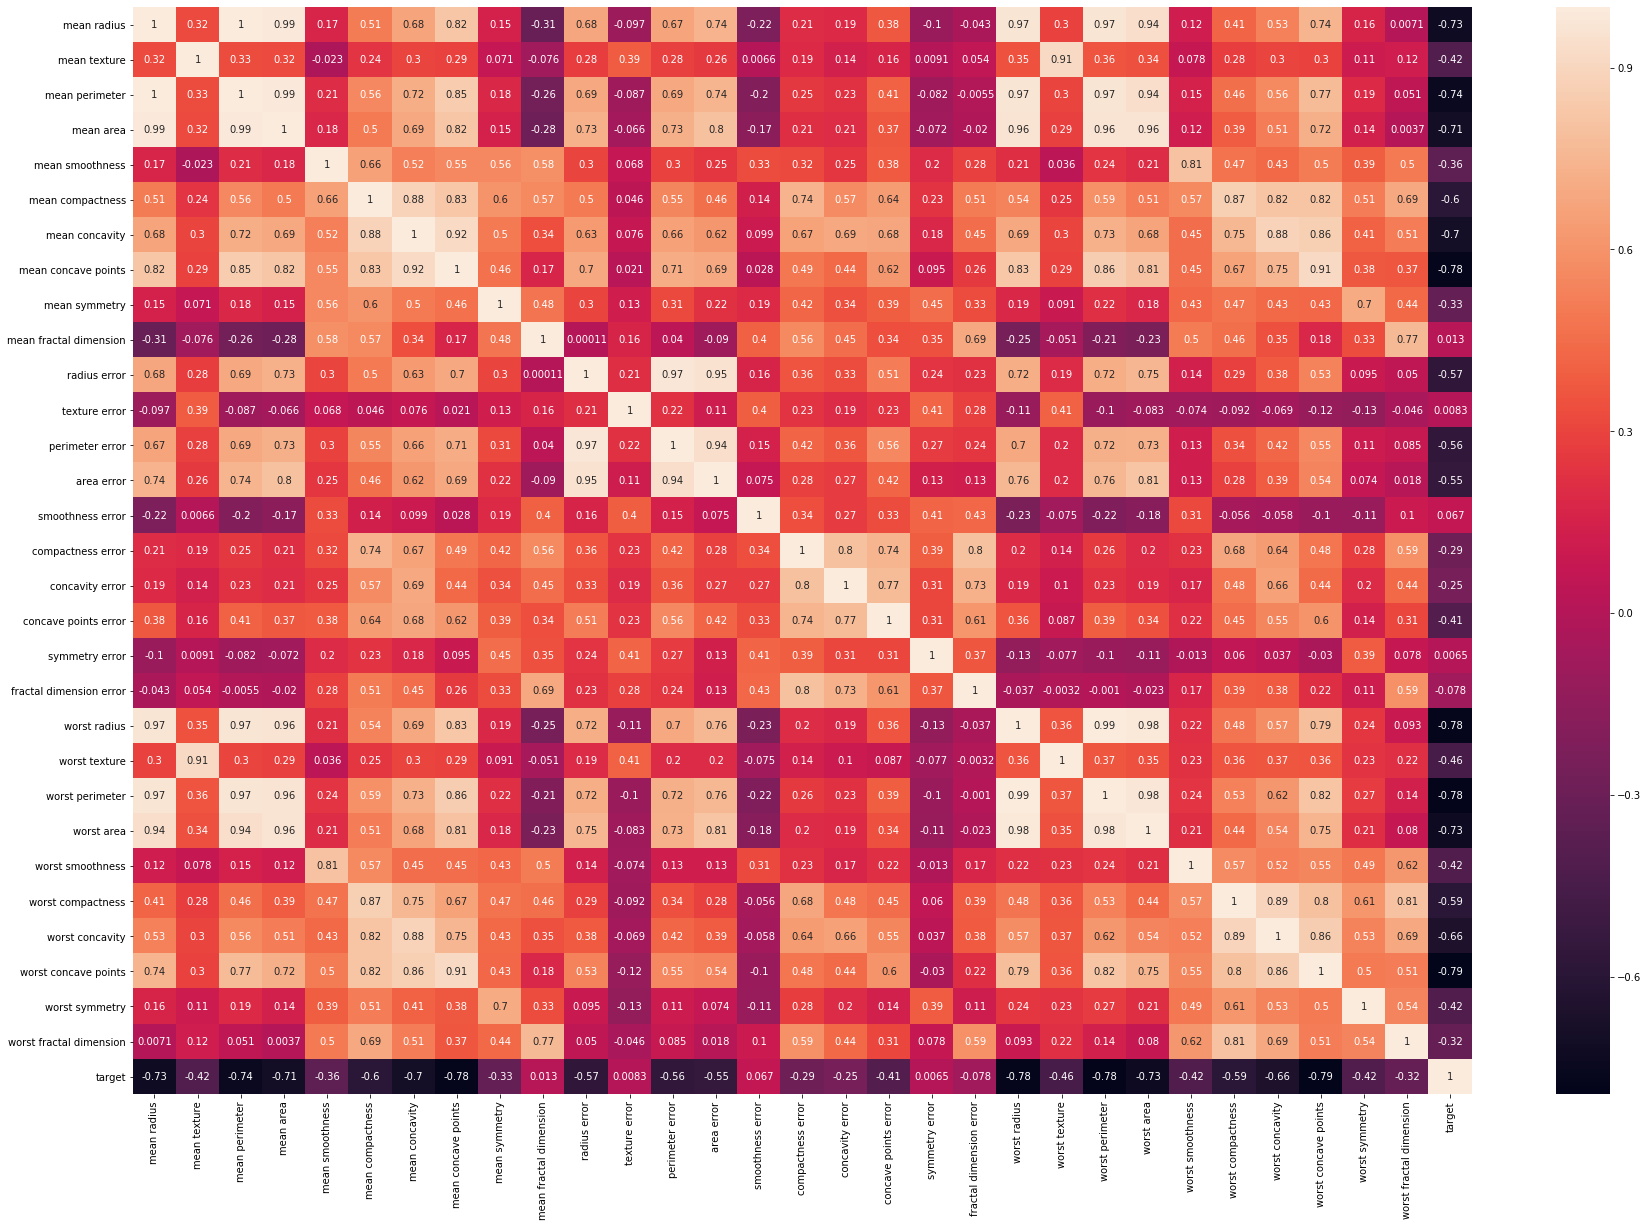

In [29]:
# Finding the correlations for the data
plt.figure(figsize = (30, 20))
sns.heatmap(df_cancer.corr(),
           annot = True)

### Setp 4#: Model Training ( Finding A problem solutions)

In [32]:
# Input records o
X = df_cancer.drop(['target'], # Dropping columns in list
                   axis=1 # For all the rows
                  )

In [33]:
# Output records or tagert
y = df_cancer['target']

In [34]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, # Test Size 
                                                    random_state=5 # Randomness in the data
                                                   )

In [105]:
# Support Vector Machine to do the classifications
from sklearn.svm import SVC
# Classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix

In [106]:
svc_model= SVC()

In [107]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Step #5: Evaluating the model

This is check whether the model is having genaralized mode or overfitted

Overfitted model - learnied all the characteristics out of the training data

This may not work model. Model should as general as possible.


## Confustion Matrix
 identify the miss classifications samples
 - Type 1 Error - Indicates the prediction was patient has the deciese but actually didn't 
 - Type 2 error - Indicates the prediction was patient is not affected by decises but actually patient has cancer (Big problem)

In [108]:
y_predict = svc_model.predict(X_test)

In [109]:
y_predict

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

[Confusions matix] is one to shop of all the matix that shows all the correctly classified samples and the misclassified samples as well.

In [110]:
cm = confusion_matrix(y_test, y_predict)


 True | Class
--- | --- 
True+| False+
False+ | True- 

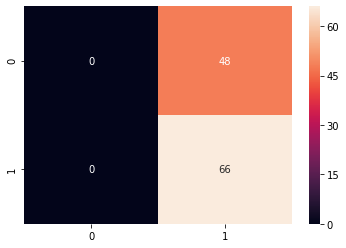

In [111]:
sns.heatmap(cm, annot=True)
# 0,0 Column is correctly classified samples (True+)
# 0,1 Column is false predictions but actual is not (False+)
# 1,1 Column is Predicted not diagnosed but actual is affetced (False-)
# 1,0 Column is Predicted is not and actual is also is not affetced (True-)

Conclustion : According confusion matrix is not accurate with SVC model

#### Data Normliazations 
     Feature scaling (Unity Based Normalizations) brings all the values into rang[0,1]
     X` = (X - Xmin)/ (Xmax - Xmin)

In [112]:
#Data Normalizations (Unity Based Normalizations)
#Training set
min_train = X_train.min()
range_train = (X_train-min_train).max()
X_train_scaled = (X_train - min_train)/range_train

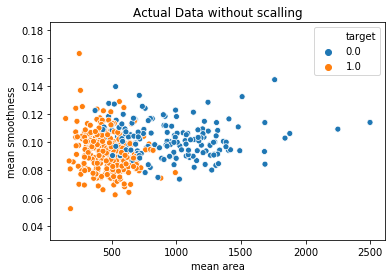

In [113]:
ax = plt.gca()
ax.set_title("Actual Data without scalling")
sns.scatterplot(x=X_train["mean area"],
               y=X_train["mean smoothness"],
               hue=y_train)

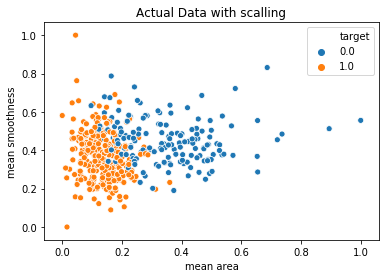

In [114]:
ax = plt.gca()
ax.set_title("Actual Data with scalling")
sns.scatterplot(x=X_train_scaled["mean area"],
               y=X_train_scaled["mean smoothness"],
               hue=y_train)

In [115]:
#Data Normalizations (Unity Based Normalizations)
# Test set
min_test = X_test.min()
range_test = (X_test-min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [116]:
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [117]:
y_predict = svc_model.predict(X_test_scaled)

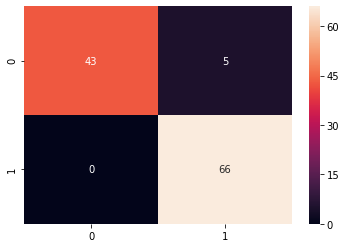

In [118]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [119]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        48
         1.0       0.93      1.00      0.96        66

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### SVM parameters Optimization

- **C Paramter**: Control tred-off between classifying training points correctly and having smooth decision boundary
    - **Small C (loose)** makes cost (penalty) of misclassifications low (soft margin)
    - **Large C (strict)** makes cost of missclassifications high (hard margin), forcing the model to explain input data strict and potentially overfit (Overfitting)
- ***Gamma Paramter***: Control how far the influence of a single training set reaches
    - **Small Gamma** far reach (more General solutions)
    - **Large Gamma** close reach ( closer data points have high weight)

In [142]:
# rbf : Radial Basis Fuctions
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001],
                     'C': [0.1, 1, 10, 100]}]


In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
grid = GridSearchCV(SVC(), tuned_parameters, refit=True, verbose=4)

In [ ]:
grid.fit(X_train_scaled, y_train)

In [146]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [147]:
grid_predict = grid.predict(X_test_scaled)

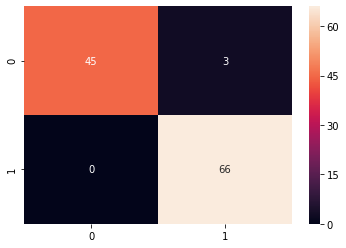

In [148]:
cm = confusion_matrix(y_test, grid_predict)
sns.heatmap(cm, annot=True)

In [127]:
print(classification_report(y_test, grid_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        48
         1.0       0.96      1.00      0.98        66

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Conclusion
- Machine Learning Techinques (SVM) was able to classify cancer into Malignant/Bengin with 97% accuracy
- The technique can rapidly evaluate breast masses and classify them in an automated fashion
- Early breast cancer can dramatically save lives especially in the developing world
- The Technique can be further improved by combining coputer vision/ML technique to directly classify cancer using tissue image